In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
ToyotaCorolla = pd.read_csv('C:/Users/Akshay/Downloads/ToyotaCorolla.csv')

In [3]:
ToyotaCorolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
ToyotaCorolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
ToyotaCorolla.shape

(1436, 38)

In [6]:
data = pd.DataFrame({'Price': ToyotaCorolla['Price'] , 'Age' : ToyotaCorolla['Age_08_04'] , 'KM':ToyotaCorolla['KM'] , 
                     'HP' : ToyotaCorolla['HP'] , 'cc' : ToyotaCorolla['cc'] , 'Doors':ToyotaCorolla['Doors'] , 
                    'Gears': ToyotaCorolla['Gears'] , 'QTax' : ToyotaCorolla['Quarterly_Tax'] , 'Weight' : ToyotaCorolla['Weight']})

In [7]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTax', 'Weight'], dtype='object')

In [9]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QTax      int64
Weight    int64
dtype: object

In [11]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QTax      0
Weight    0
dtype: int64

In [12]:
data.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [13]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
data.drop_duplicates(inplace = True)

In [15]:
data.iloc[110:120,:]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
112,24950,8,13253,116,2000,5,5,234,1320
114,22950,7,10000,116,2000,5,5,234,1270
115,24990,8,6000,90,2000,5,5,234,1280
116,21950,8,10841,90,2000,5,5,234,1270
117,17900,7,1,110,1600,3,5,85,1105
118,19250,20,63000,90,2000,5,5,234,1255
119,22250,17,57313,110,2000,5,5,234,1275
120,18950,13,57037,110,1600,5,5,85,1115


In [16]:
data = data.reset_index()

In [17]:
data.iloc[110:120,:]

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
110,110,31000,4,4000,116,2000,5,5,283,1480
111,111,31275,4,1500,116,2000,5,5,283,1480
112,112,24950,8,13253,116,2000,5,5,234,1320
113,114,22950,7,10000,116,2000,5,5,234,1270
114,115,24990,8,6000,90,2000,5,5,234,1280
115,116,21950,8,10841,90,2000,5,5,234,1270
116,117,17900,7,1,110,1600,3,5,85,1105
117,118,19250,20,63000,90,2000,5,5,234,1255
118,119,22250,17,57313,110,2000,5,5,234,1275
119,120,18950,13,57037,110,1600,5,5,85,1115


In [18]:
data.shape

(1435, 10)

In [19]:
data = data.drop('index', axis = 1)

In [20]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# removing gears column as it has very less correlation with Price

In [21]:
data = data.drop('Gears', axis = 1)

In [22]:
data

,Price,Age,KM,HP,cc,Doors,QTax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,69,1025
1431,10845,72,19000,86,1300,3,69,1015
1432,8500,71,17016,86,1300,3,69,1015
1433,7250,70,16916,86,1300,3,69,1015


In [23]:
data.corr()

,Price,Age,KM,HP,cc,Doors,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,0.107353,0.301734
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.621988,1.000000


<AxesSubplot:>

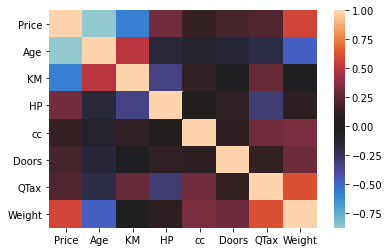

In [24]:
sns.heatmap(data.corr() , center=0)

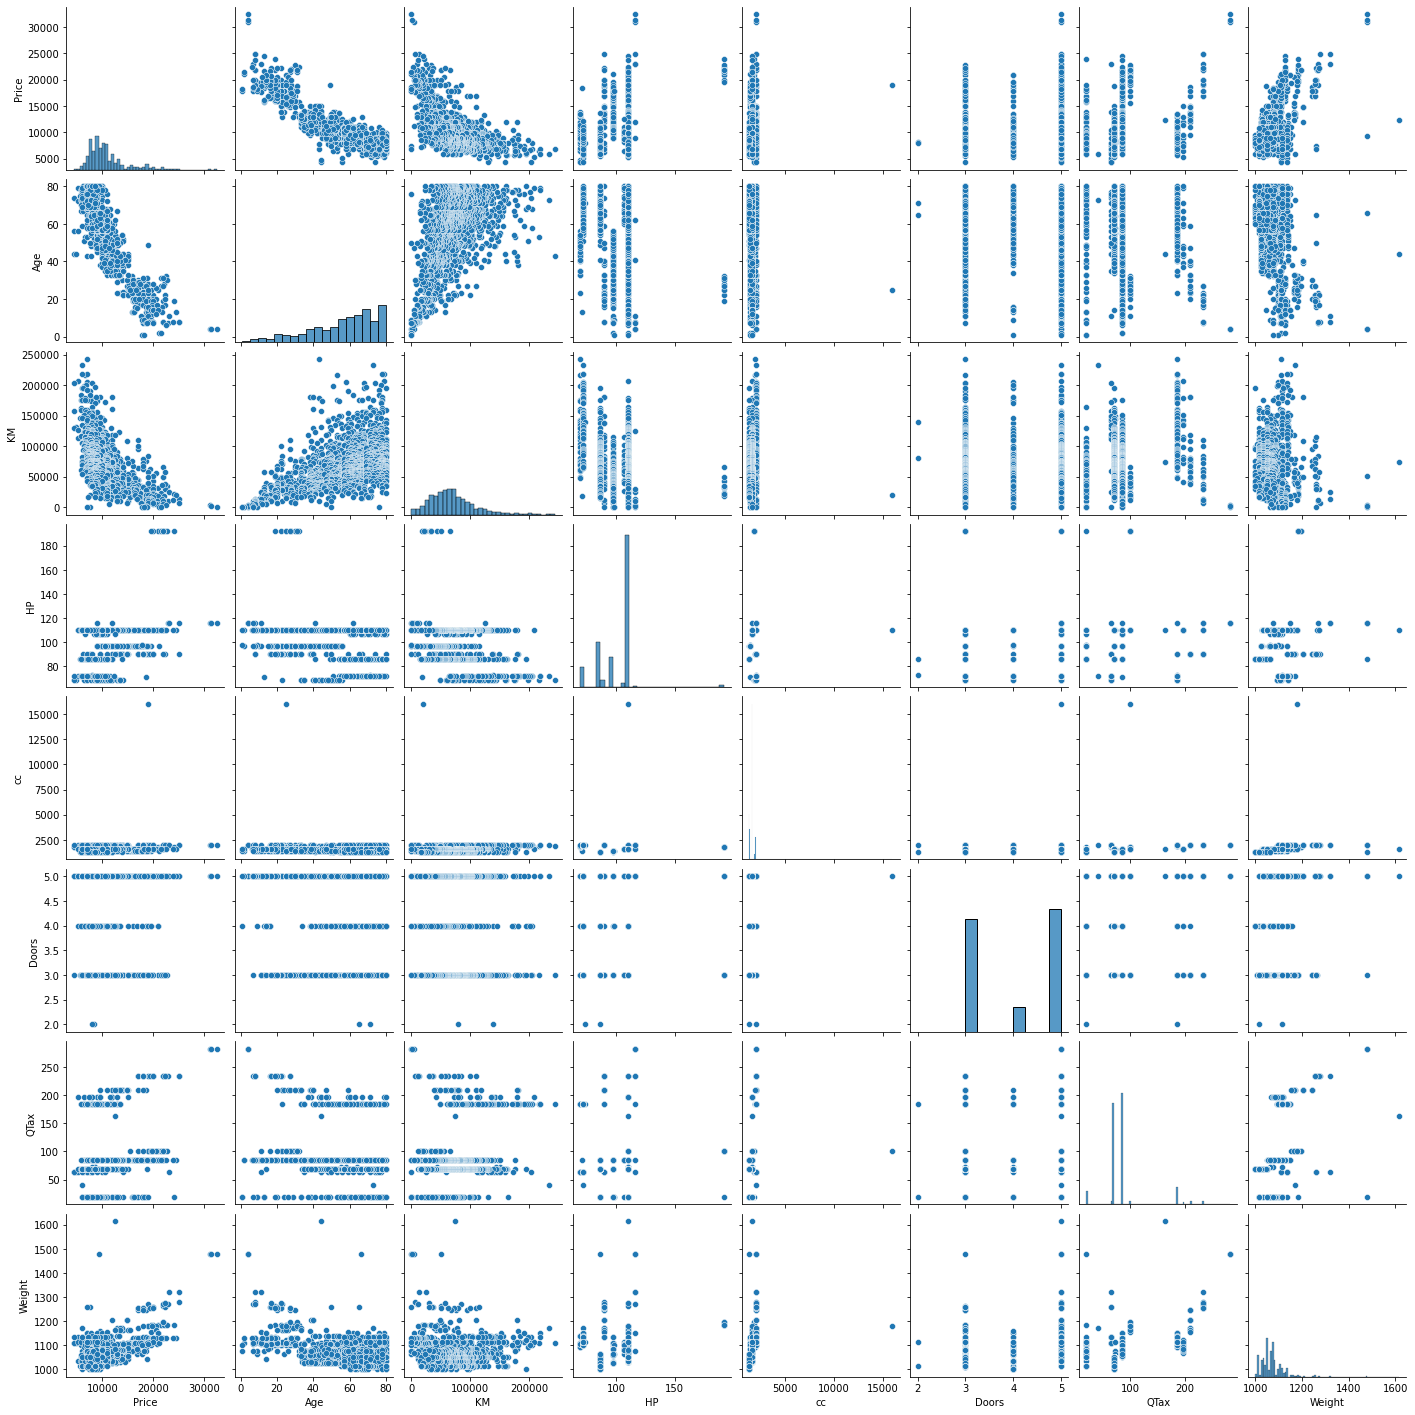

In [25]:
sns.pairplot(data)

# Price is highly negatively correlated with ag

# Price is very less correlated with cc , followed by Doors

# Quarterly tax and weight has relatively high positive correlation

# Defining x and Y variables

In [26]:
X = data.loc[ : , data.columns != 'Price']

In [27]:
Y = data['Price']

In [28]:
X

,Age,KM,HP,cc,Doors,QTax,Weight
0,23,46986,90,2000,3,210,1165
1,23,72937,90,2000,3,210,1165
2,24,41711,90,2000,3,210,1165
3,26,48000,90,2000,3,210,1165
4,30,38500,90,2000,3,210,1170
...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,69,1025
1431,72,19000,86,1300,3,69,1015
1432,71,17016,86,1300,3,69,1015
1433,70,16916,86,1300,3,69,1015


In [29]:
Y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64

# building a model

# MODEL 1

In [30]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+QTax+Weight' , data=data).fit()

In [31]:
model.rsquared

0.861632231877993

In [32]:
R1 = pd.DataFrame({'Model no.' : '1' , 'R_squared' : '0.86'} , index = [0])
R1

,Model no.,R_squared
0,1,0.86


In [33]:
model.fittedvalues

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

In [34]:
model.resid

0      -3328.839912
1      -2548.032122
2      -2864.888187
3      -1492.555915
4      -2483.902063
           ...     
1430   -1283.176655
1431    2564.629705
1432      57.200706
1433   -1316.692519
1434   -3424.167169
Length: 1435, dtype: float64

In [35]:
model.pvalues

Intercept     1.313394e-02
Age          6.480986e-288
KM            4.646226e-55
HP            5.622551e-33
cc            1.745423e-01
Doors         5.425721e-01
QTax          2.158809e-03
Weight        1.297391e-51
dtype: float64

In [36]:
np.round(model.pvalues['cc'] , 4)

0.1745

In [37]:
np.round(model.pvalues['Doors'] , 4)

0.5426

In [38]:
np.round(model.pvalues['QTax'] , 4)

0.0022

# Building linear models with cc and Doors because its slope has high p values

In [39]:
model = smf.ols('Price~cc' , data=data).fit()

In [40]:
model.rsquared

0.01546901962024072

In [41]:
model.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

<AxesSubplot:xlabel='cc', ylabel='Price'>

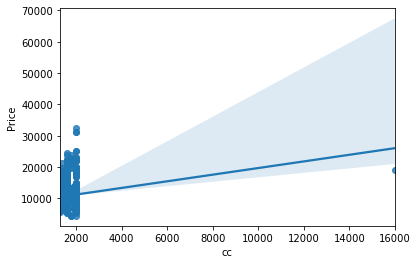

In [42]:
sns.regplot(x = 'cc' , y = 'Price' , data = data)

In [43]:
model = smf.ols('Price~Doors' , data=data).fit()

In [44]:
model.rsquared

0.033710397123388636

In [45]:
model.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

<AxesSubplot:xlabel='Doors', ylabel='Price'>

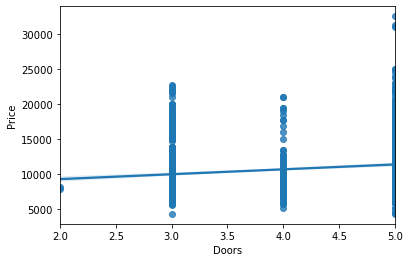

In [46]:
sns.regplot(x = 'Doors' , y = 'Price' , data = data)

# Removing cc variable as it has very less rsquared value in the linear model and high p value of its slope compared to Doors variable .

In [47]:
data = data.drop('cc' , axis = 1)

In [48]:
data

,Price,Age,KM,HP,Doors,QTax,Weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,69,1025
1431,10845,72,19000,86,3,69,1015
1432,8500,71,17016,86,3,69,1015
1433,7250,70,16916,86,3,69,1015


# MODEL 2

In [49]:
model = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [50]:
model.rsquared

0.8614533011459559

In [51]:
R2 = pd.DataFrame({'Model no.' : '2' , 'R_squared' : '0.86'} , index = [0])
R2

,Model no.,R_squared
0,2,0.86


# MODEL VALIDATION TECHNIQUES

# 1. checking vif

In [52]:
A_RD = smf.ols('Age~KM+HP+Doors+QTax+Weight' , data = data).fit().rsquared
vif_A = 1/(1-A_RD)
vif_A

1.8754157698689953

In [53]:
KM_RD = smf.ols('KM~Age+HP+Doors+QTax+Weight' , data = data).fit().rsquared
vif_KM = 1/(1-KM_RD)
vif_KM

1.7389173124604933

In [54]:
HP_RD = smf.ols('HP~Age+KM+Doors+QTax+Weight' , data = data).fit().rsquared
vif_HP = 1/(1-HP_RD)
vif_HP

1.3252458568327523

In [55]:
D_RD = smf.ols('Doors~Age+KM+HP+QTax+Weight' , data = data).fit().rsquared
vif_D = 1/(1-D_RD)
vif_D

1.1139391313630984

In [56]:
Q_RD = smf.ols('QTax~Age+KM+HP+Doors+Weight' , data = data).fit().rsquared
vif_Q = 1/(1-Q_RD)
vif_Q

2.256997248985599

In [57]:
W_RD = smf.ols('Weight~Age+KM+HP+Doors+QTax' , data = data).fit().rsquared
vif_W = 1/(1-W_RD)
vif_W

2.423422626616171

In [58]:
vif_table = pd.DataFrame({'X_variables': ['Age' , 'KM' , 'HP' , 'Doors' , 'QTax' , 'Weight'] , 'vif':['1.87','1.74' , '1.32' , '1.11' , '2.26' , '2.42']})

In [59]:
vif_table

,X_variables,vif
0,Age,1.87
1,KM,1.74
2,HP,1.32
3,Doors,1.11
4,QTax,2.26
5,Weight,2.42


# All vif factors seems to be at a good level , so we can be confident that multi collinearity is not a problem in our model

# 2. Checking for normality of errors

In [60]:
model.resid

0      -3339.719690
1      -2555.830091
2      -2876.350450
3      -1503.183434
4      -2494.317424
           ...     
1430   -1273.854299
1431    2571.571462
1432      63.862906
1433   -1310.086141
1434   -3437.132174
Length: 1435, dtype: float64

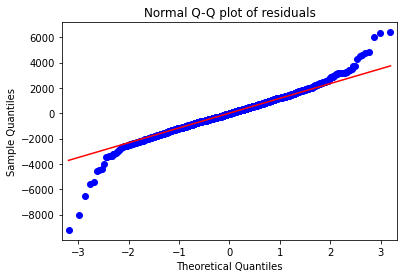

In [61]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

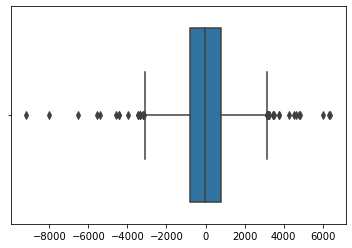

In [62]:
sns.boxplot(model.resid)

# Identifying outliers using influence plot

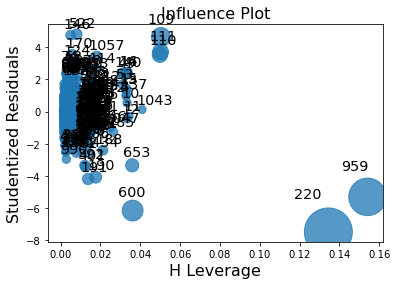

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [64]:
data.iloc[220]

Price     12450
Age          44
KM        74172
HP          110
Doors         5
QTax        163
Weight     1615
Name: 220, dtype: int64

# dropping the outlier

In [65]:
data = data.drop(data.index[220] , axis = 0)

In [66]:
data.iloc[215:225 , :]

,Price,Age,KM,HP,Doors,QTax,Weight
215,13500,33,75699,69,3,185,1105
216,10950,41,75697,97,3,69,1025
217,10950,44,74846,97,3,69,1025
218,12950,38,74319,110,5,85,1075
219,11950,43,74285,110,5,85,1075
221,11950,40,73042,110,5,85,1075
222,14950,44,71793,110,4,197,1067
223,12450,35,71200,110,5,85,1075
224,12950,38,67805,110,5,85,1075
225,11950,35,65988,110,3,69,1040


In [67]:
data = data.reset_index()

In [68]:
data = data.drop('index' , axis = 1)

In [69]:
data.iloc[218:222 , :]

,Price,Age,KM,HP,Doors,QTax,Weight
218,12950,38,74319,110,5,85,1075
219,11950,43,74285,110,5,85,1075
220,11950,40,73042,110,5,85,1075
221,14950,44,71793,110,4,197,1067


In [70]:
model = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [71]:
model.rsquared

0.8666728532499486

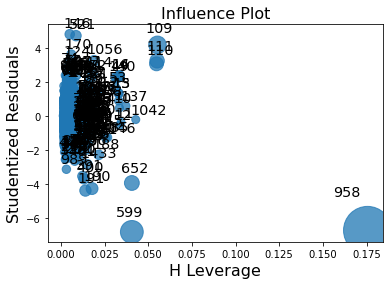

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
data = data.drop(data.index[958] , axis = 0)
data = data.reset_index()
data = data.drop('index' , axis = 1)
data.iloc[950:960, :]

,Price,Age,KM,HP,Doors,QTax,Weight
950,8400,60,52487,110,4,69,1035
951,9250,66,52383,86,3,69,1015
952,8900,61,52112,110,4,69,1035
953,8750,58,51712,110,3,69,1050
954,10950,58,51421,110,5,85,1105
955,8950,61,51235,86,4,69,1000
956,8950,65,51000,86,3,69,1015
957,8895,61,50925,110,5,85,1070
958,8750,59,50469,110,5,85,1070
959,9750,61,50173,110,5,85,1075


In [74]:
model = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [75]:
model.rsquared

0.8707773883293434

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

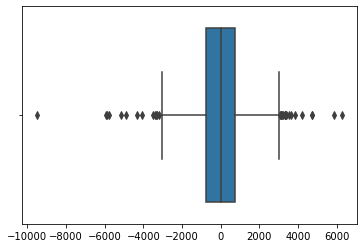

In [76]:
sns.boxplot(model.resid)

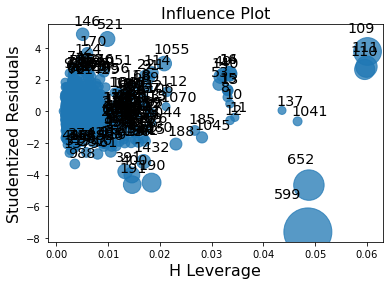

In [77]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [78]:
data = data.drop(data.index[599] , axis = 0)
data = data.reset_index()
data = data.drop('index' , axis = 1)
data.iloc[590:600, :]

,Price,Age,KM,HP,Doors,QTax,Weight
590,9950,47,26221,97,3,69,1025
591,10950,50,22648,97,5,85,1060
592,10800,50,22500,97,3,69,1025
593,10500,56,19313,97,3,69,1025
594,10450,50,17619,110,4,69,1030
595,10600,51,17069,97,3,69,1025
596,10450,48,15000,97,3,69,1025
597,12950,50,10210,97,5,85,1065
598,11250,47,5309,110,3,85,1070
599,8950,52,31000,97,3,69,1025


In [79]:
model = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [80]:
model.rsquared

0.8757696670062488

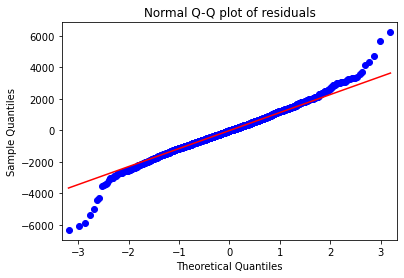

In [81]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

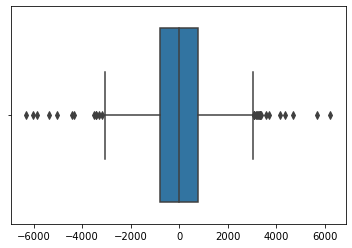

In [82]:
sns.boxplot(model.resid)

In [83]:
Predicted = model.fittedvalues

In [84]:
Errors = model.resid

In [85]:
data['Predicted'] = Predicted
data['Errors'] = Errors

In [86]:
data

,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,3,210,1165,16814.253744,-3314.253744
1,13750,23,72937,90,3,210,1165,16250.445270,-2500.445270
2,13950,24,41711,90,3,210,1165,16814.650398,-2864.650398
3,14950,26,48000,90,3,210,1165,16449.601510,-1499.601510
4,13750,30,38500,90,3,210,1170,16323.925848,-2573.925848
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,3,69,1025,8869.668356,-1369.668356
1428,10845,72,19000,86,3,69,1015,8311.074940,2533.925060
1429,8500,71,17016,86,3,69,1015,8468.386493,31.613507
1430,7250,70,16916,86,3,69,1015,8584.766477,-1334.766477


# Scaling the data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
data1 = data.copy()

In [89]:
data1

,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,3,210,1165,16814.253744,-3314.253744
1,13750,23,72937,90,3,210,1165,16250.445270,-2500.445270
2,13950,24,41711,90,3,210,1165,16814.650398,-2864.650398
3,14950,26,48000,90,3,210,1165,16449.601510,-1499.601510
4,13750,30,38500,90,3,210,1170,16323.925848,-2573.925848
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,3,69,1025,8869.668356,-1369.668356
1428,10845,72,19000,86,3,69,1015,8311.074940,2533.925060
1429,8500,71,17016,86,3,69,1015,8468.386493,31.613507
1430,7250,70,16916,86,3,69,1015,8584.766477,-1334.766477


In [90]:
 array = data1.to_numpy() #converting dataframe values intp array

In [91]:
array

array([[ 1.35000000e+04,  2.30000000e+01,  4.69860000e+04, ...,
         1.16500000e+03,  1.68142537e+04, -3.31425374e+03],
       [ 1.37500000e+04,  2.30000000e+01,  7.29370000e+04, ...,
         1.16500000e+03,  1.62504453e+04, -2.50044527e+03],
       [ 1.39500000e+04,  2.40000000e+01,  4.17110000e+04, ...,
         1.16500000e+03,  1.68146504e+04, -2.86465040e+03],
       ...,
       [ 8.50000000e+03,  7.10000000e+01,  1.70160000e+04, ...,
         1.01500000e+03,  8.46838649e+03,  3.16135069e+01],
       [ 7.25000000e+03,  7.00000000e+01,  1.69160000e+04, ...,
         1.01500000e+03,  8.58476648e+03, -1.33476648e+03],
       [ 6.95000000e+03,  7.60000000e+01,  1.00000000e+00, ...,
         1.11400000e+03,  1.12669860e+04, -4.31698604e+03]])

In [92]:
scaler = StandardScaler().fit(array)
scaled = scaler.transform(array)

In [93]:
scaled

array([[ 0.76932861, -1.77621088, -0.57758324, ...,  1.91388012,
         1.803176  , -2.60489512],
       [ 0.83858475, -1.77621088,  0.11499369, ...,  1.91388012,
         1.63627653, -1.96526826],
       [ 0.89398967, -1.72236352, -0.71836176, ...,  1.91388012,
         1.80329342, -2.25152159],
       ...,
       [-0.61579431,  0.80846248, -1.37741873, ..., -1.15626357,
        -0.66738075,  0.02484718],
       [-0.96207504,  0.75461512, -1.38008751, ..., -1.15626357,
        -0.63292976, -1.04908283],
       [-1.04518242,  1.07769929, -1.83151285, ...,  0.87003127,
         0.16106509, -3.39300993]])

In [94]:
scaledata = pd.DataFrame(scaled , columns = ['Price','Age','KM','HP','Doors','QTax','Weight','Predicted','Errors'])

In [95]:
scaledata

,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,0.769329,-1.776211,-0.577583,-0.767939,-1.085394,3.006954,1.913880,1.803176,-2.604895
1,0.838585,-1.776211,0.114994,-0.767939,-1.085394,3.006954,1.913880,1.636277,-1.965268
2,0.893990,-1.722364,-0.718362,-0.767939,-1.085394,3.006954,1.913880,1.803293,-2.251522
3,1.171014,-1.614669,-0.550522,-0.767939,-1.085394,3.006954,1.913880,1.695231,-1.178638
4,0.838585,-1.399279,-0.804057,-0.767939,-1.085394,3.006954,2.016218,1.658028,-2.023022
...,...,...,...,...,...,...,...,...,...
1427,-0.892819,0.700768,-1.283264,-1.034935,-1.085394,-0.440903,-0.951587,-0.548593,-1.076515
1428,0.033828,0.862310,-1.324470,-1.034935,-1.085394,-0.440903,-1.156264,-0.713948,1.991582
1429,-0.615794,0.808462,-1.377419,-1.034935,-1.085394,-0.440903,-1.156264,-0.667381,0.024847
1430,-0.962075,0.754615,-1.380088,-1.034935,-1.085394,-0.440903,-1.156264,-0.632930,-1.049083


# Residual Plot for Homoscedasticity

# Fitted vs residuals

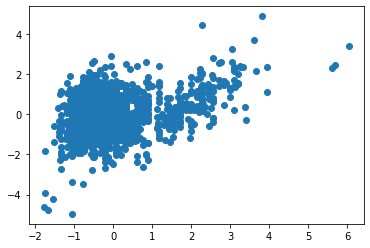

In [96]:
plt.scatter(x = scaledata['Price'] , y = scaledata['Errors'])

# Regressors vs Residuals

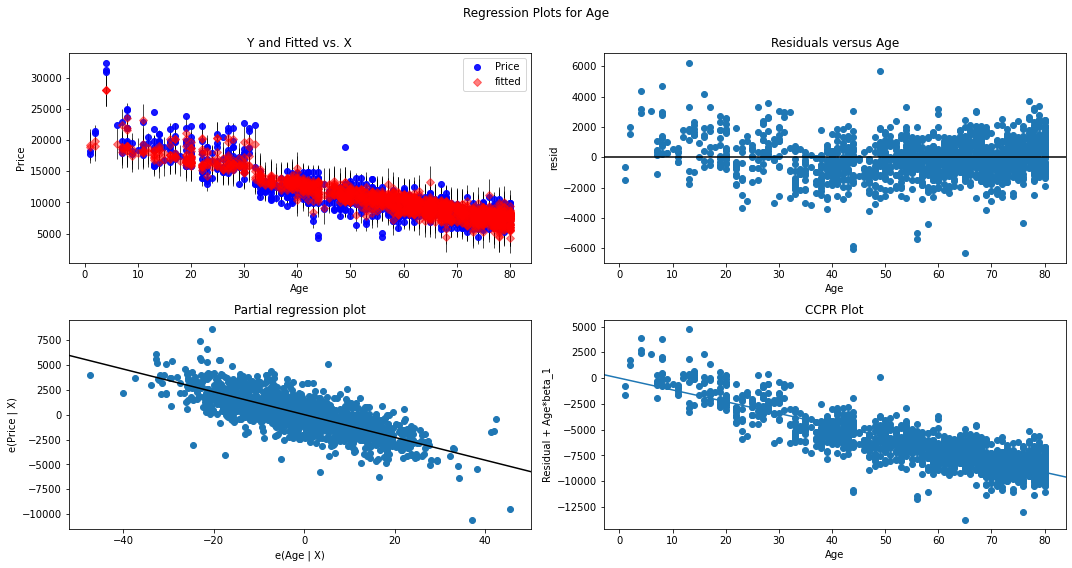

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

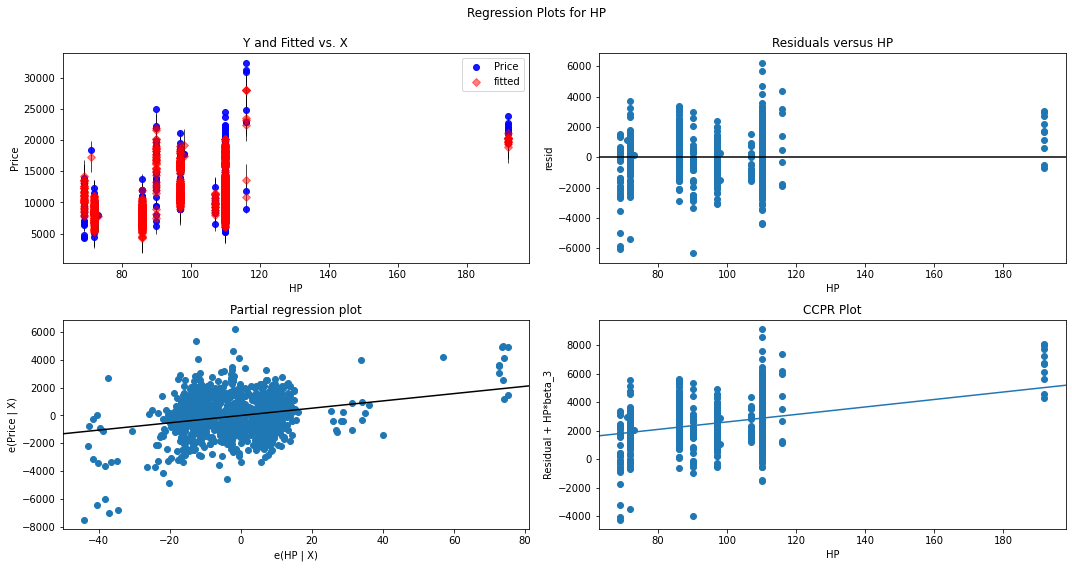

In [98]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

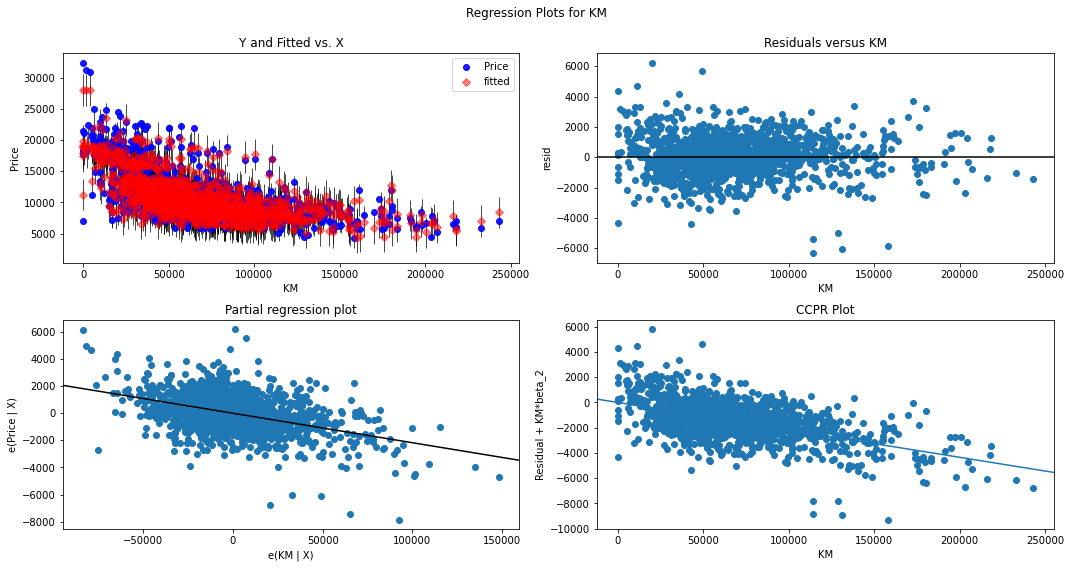

In [99]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

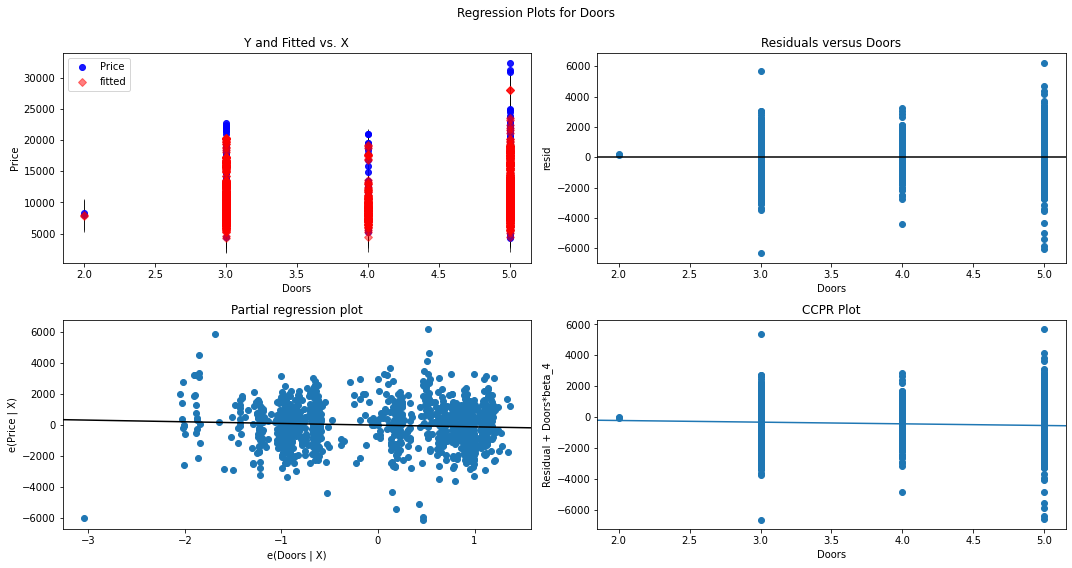

In [100]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

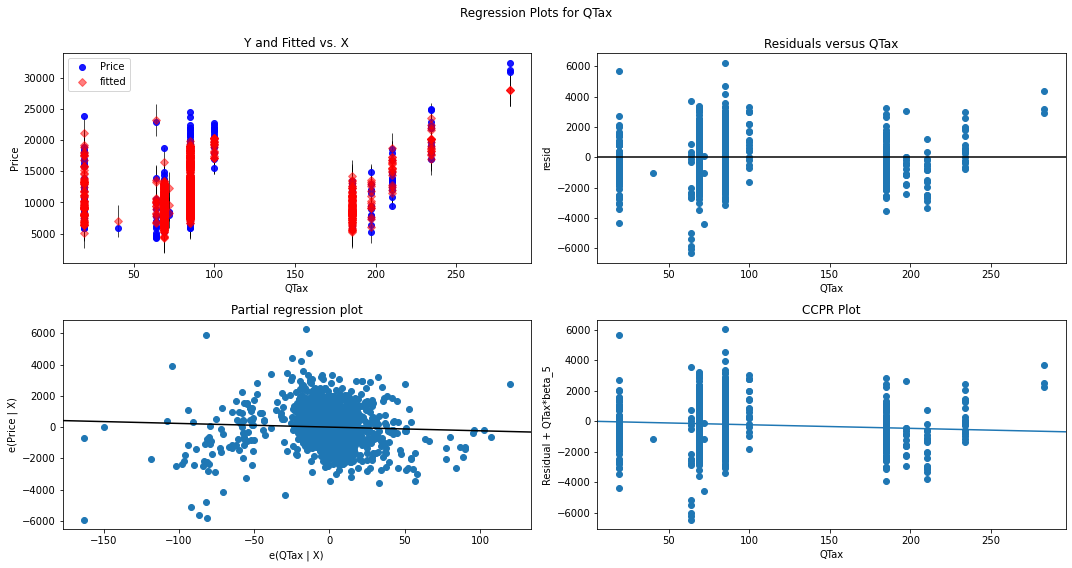

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QTax", fig=fig)
plt.show()

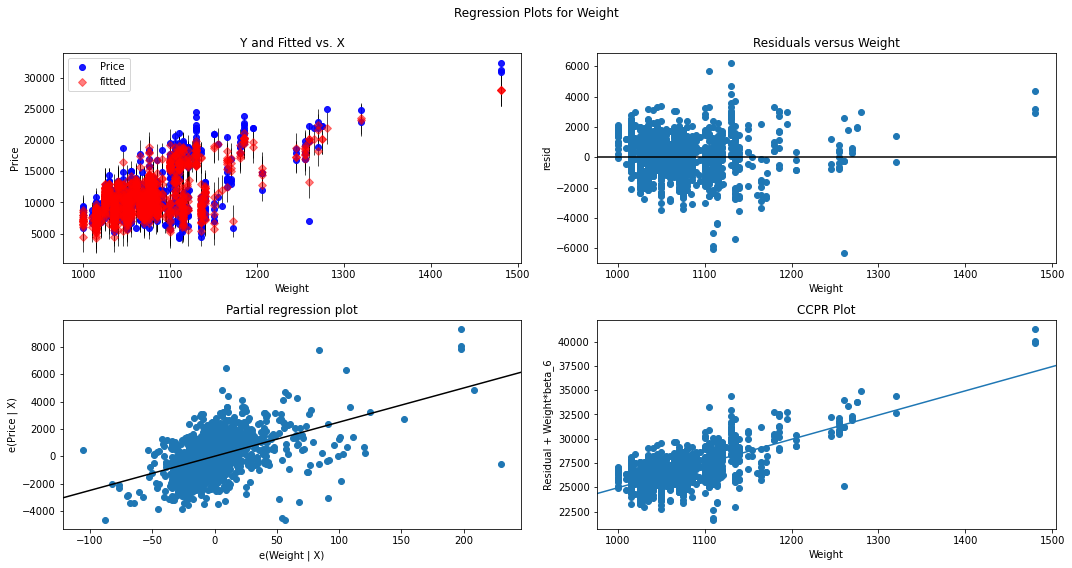

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# heteroscedasticity is observed
# transforming the variables
# MODEL 3

In [103]:
x_sqrt = np.sqrt(data[['Age','KM','HP','Doors','QTax','Weight' ]])

In [104]:
model = smf.ols('Price~x_sqrt' , data=data).fit()

In [105]:
model.rsquared

0.882011222652204

In [106]:
R3 = pd.DataFrame({'Model no.' : '3' , 'R_squared' : '0.88'} , index = [0])
R3

,Model no.,R_squared
0,3,0.88


# MODEL 4

In [107]:
y_sqrt = np.sqrt(data['Price'])

In [108]:
model = smf.ols('y_sqrt~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [109]:
model.rsquared

0.8729590769687017

In [110]:
R4 = pd.DataFrame({'Model no.' : '4' , 'R_squared' : '0.87'} , index = [0])
R4

,Model no.,R_squared
0,4,0.87


# MODEL 5

In [111]:
model = smf.ols('y_sqrt~x_sqrt' , data=data).fit()

In [112]:
model.rsquared

0.8677047717981362

In [113]:
R5 = pd.DataFrame({'Model no.' : '5' , 'R_squared' : '0.86'} , index = [0])
R5

,Model no.,R_squared
0,5,0.86


# MODEL 6

In [114]:
x_log = np.log(data[['Age','KM','HP','Doors','QTax','Weight' ]])

In [115]:
model = smf.ols('Price~x_log' , data=data).fit()

In [116]:
model.rsquared

0.8295279714901236

In [117]:
R6 = pd.DataFrame({'Model no.' : '6' , 'R_squared' : '0.82'} , index = [0])
R6

,Model no.,R_squared
0,6,0.82


# MODEL 7

In [118]:
y_log = np.log(data['Price'])

In [119]:
model = smf.ols('y_log~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [120]:
model.rsquared

0.8538452644003061

In [121]:
R7 = pd.DataFrame({'Model no.' : '7' , 'R_squared' : '0.85'} , index = [0])
R7

,Model no.,R_squared
0,7,0.85


# MODEL 8

In [123]:
model = smf.ols('y_log~x_log' , data=data).fit()

In [124]:
model.rsquared

0.7492279667322816

In [125]:
R8 = pd.DataFrame({'Model no.' : '8' , 'R_squared' : '0.75'} , index = [0])
R8

,Model no.,R_squared
0,8,0.75


# WE CAN FINALLY CHOOSE MODEL 3 AS IT GIVES THE BEST RSQUARED VALUE AFTER TRANSFORMATION

In [126]:
model = smf.ols('Price~x_sqrt' , data=data).fit()

In [127]:
R3 = pd.DataFrame({'Model no.' : '3' , 'R_squared' : '0.88'} , index = [0])
R3

,Model no.,R_squared
0,3,0.88


In [128]:
model.fittedvalues

0       16691.557147
1       16148.985370
2       16660.579559
3       16201.955555
4       15946.081830
            ...     
1427     8992.225285
1428     8575.640498
1429     8741.781073
1430     8837.200457
1431    12005.693371
Length: 1432, dtype: float64

In [129]:
model.resid

0      -3191.557147
1      -2398.985370
2      -2710.579559
3      -1251.955555
4      -2196.081830
           ...     
1427   -1492.225285
1428    2269.359502
1429    -241.781073
1430   -1587.200457
1431   -5055.693371
Length: 1432, dtype: float64